In [3]:
# Crear una tabla con la cantidad de pixeles que tiene la imagen - Histograma
import cv2 as cv
#url="../PercepciónCOmputacional/Imagenes/BSDS300-images/BSDS300/images/train"
img01=cv.imread('flowers.jpeg')
img02=cv.imread('flowers.jpeg',cv.IMREAD_GRAYSCALE)

In [4]:
from matplotlib import pyplot as plt

In [5]:
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

Histograma de imagen en niveles de gris

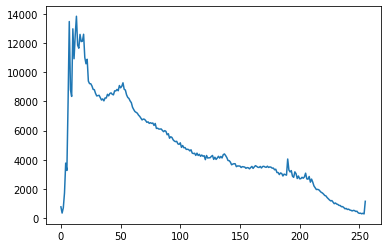

In [9]:
# calcHist -> Calcula el histograma de una imagen
# Parametros
# img, channels, mask, histSize, ranges
hist = cv.calcHist([img02], [0], None, [256], [0,256])
plt.plot(hist)

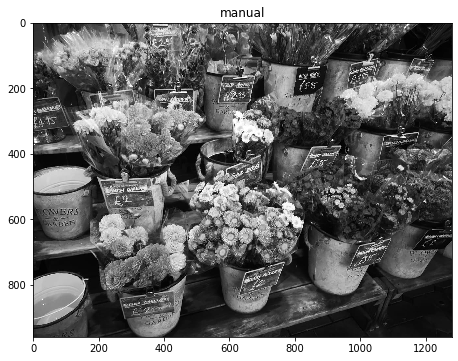

In [10]:
imshow("manual", img02)

In [ ]:
# Equializar con openCV
hist2 = cv.calcHist(flores)

PROCESO DE ECUALIZACION

In [19]:
import numpy as np

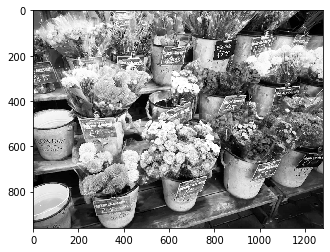

In [22]:
histogram, bins = np.histogram(img02.flatten(), 256, [0,256])

# Obtener histograma original
cdf = histogram.cumsum()

# Normalizar
cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())

# Reasignar
equalized_image = np.interp(img02.flatten(), bins[:-1], cdf_normalized).reshape(img02.shape)
plt.imshow(equalized_image, cmap='gray')

### Ecualizador de imagen a color

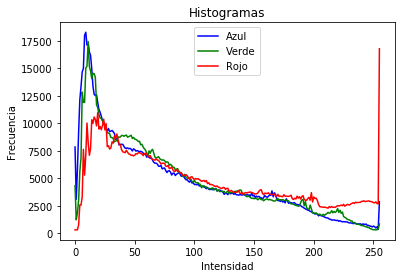

In [36]:
def plot_rbg_histogramTodo():
    # Dividir la imagen en canales RGB

    b, g, r = cv.split(img01)

    # Calcular histograma de cada canal
    hist_b = cv.calcHist([b], [0], None, [256], [0, 256])
    hist_g = cv.calcHist([g], [0], None, [256], [0, 256])
    hist_r = cv.calcHist([r], [0], None, [256], [0, 256])

    # Agregar plots de cada canal
    plt.plot(hist_b, color='blue', label='Azul')
    plt.plot(hist_g, color='green', label='Verde')
    plt.plot(hist_r, color='red', label='Rojo')

    # Etiquetas
    plt.title('Histogramas')
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia')
    plt.legend()
    
    # Mostrar
    plt.show()


plot_rbg_histogramTodo()

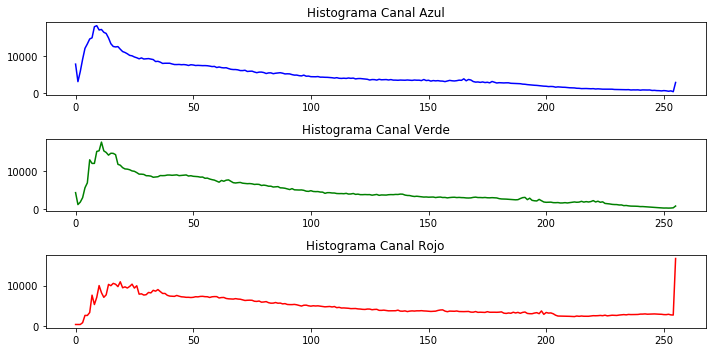

In [40]:
def plot_rgb_histograms():
    # Dividir la imagen en canales RGB
    b, g, r = cv.split(img01)

    # Calcular los histogramas de cada canal
    hist_b = cv.calcHist([b], [0], None, [256], [0, 256])
    hist_g = cv.calcHist([g], [0], None, [256], [0, 256])
    hist_r = cv.calcHist([r], [0], None, [256], [0, 256])

    # Graficar los histogramas
    plt.figure(figsize=(10, 5))

    plt.subplot(3, 1, 1)
    plt.plot(hist_b, color='blue')
    plt.title('Histograma Canal Azul')

    plt.subplot(3, 1, 2)
    plt.plot(hist_g, color='green')
    plt.title('Histograma Canal Verde')

    plt.subplot(3, 1, 3)
    plt.plot(hist_r, color='red')
    plt.title('Histograma Canal Rojo')

    plt.tight_layout()
    plt.show()
plot_rgb_histograms()

Equalizar imagen

In [46]:
def equalizar_imagen():
    b, g, r = cv.split(img01)
    
    # Ecualizar el canal de valor (V)
    equ_b = cv.equalizeHist(b)
    equ_g = cv.equalizeHist(g)
    equ_r = cv.equalizeHist(r)
    
    # Fusionar los canales nuevamente en la imagen HSV
    equ_image = cv.merge([equ_b,equ_g,equ_r])
    
    # Mostrar
    #imshow(equ_image, "ecualizada")
equalizar_imagen()

In [ ]:
def ecualizacion_adaptativa():
    